In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

# Checking DataTypes

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Checking Null Values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values present in the dataset,so we can proceed further.

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df['TotalCharges'].nunique()

6531

In [10]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
#df['SeniorCitizen'].unique()

In [12]:
#df['SeniorCitizen'].nunique()

In [13]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
#df['SeniorCitizen']=df['SeniorCitizen'].replace(' ',np.nan)

Converting Column type from object to float

In [14]:
df['TotalCharges']=df['TotalCharges'].astype(float)
#df['SeniorCitizen']=df['SeniorCitizen'].astype(float)

We can now replace null values by mean values in total charges column

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))
#df['SeniorCitizen']=df['SeniorCitizen'].fillna(np.mean(df['SeniorCitizen']))

In [16]:
(df['TotalCharges'].dropna())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [17]:
(df['SeniorCitizen'].dropna())

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

# EDA PROCESS

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Visualization of Data

For Nominal Data

Male      3555
Female    3488
Name: gender, dtype: int64


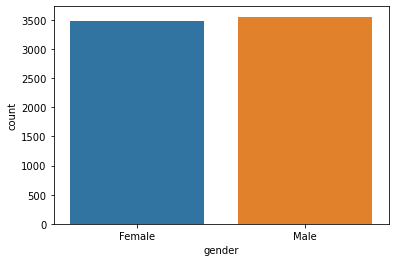

In [20]:
sns.countplot(df['gender'])
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


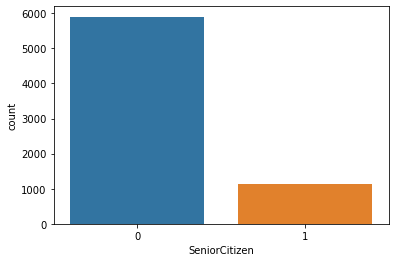

In [21]:
sns.countplot(df['SeniorCitizen'])
print(df['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


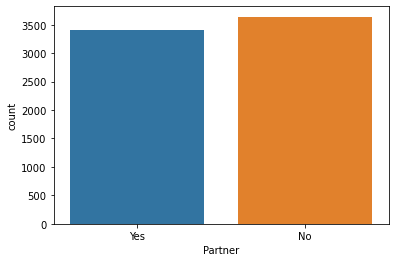

In [22]:
sns.countplot(df['Partner'])
print(df['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


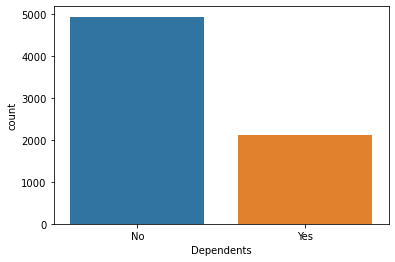

In [23]:
sns.countplot(df['Dependents'])
print(df['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


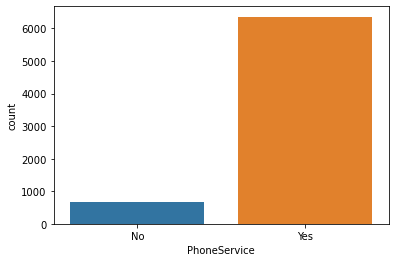

In [24]:
sns.countplot(df['PhoneService'])
print(df['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


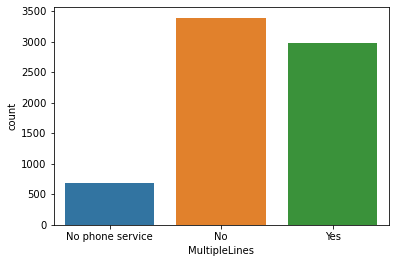

In [25]:
sns.countplot(df['MultipleLines'])
print(df['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


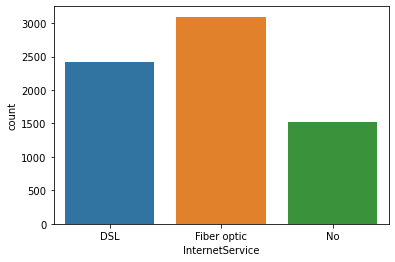

In [26]:
sns.countplot(df['InternetService'])
print(df['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


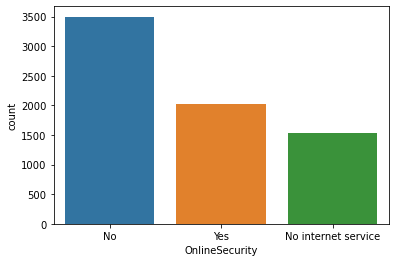

In [27]:
sns.countplot(df['OnlineSecurity'])
print(df['OnlineSecurity'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


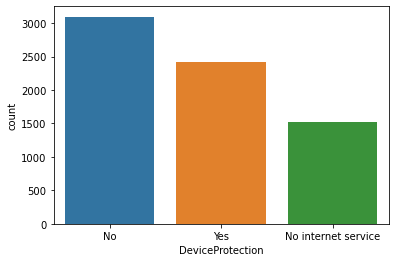

In [28]:
sns.countplot(df['DeviceProtection'])
print(df['DeviceProtection'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


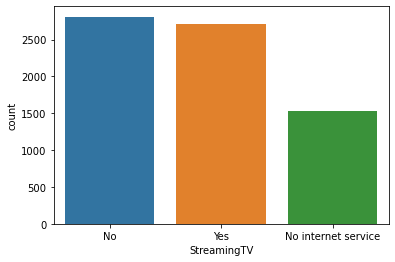

In [29]:
sns.countplot(df['StreamingTV'])
print(df['StreamingTV'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


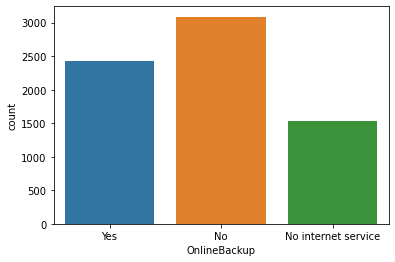

In [30]:
sns.countplot(df['OnlineBackup'])
print(df['OnlineBackup'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


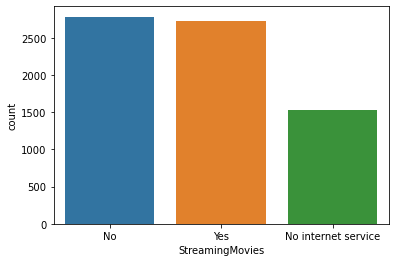

In [31]:
sns.countplot(df['StreamingMovies'])
print(df['StreamingMovies'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


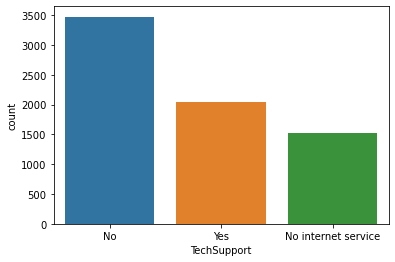

In [32]:
sns.countplot(df['TechSupport'])
print(df['TechSupport'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


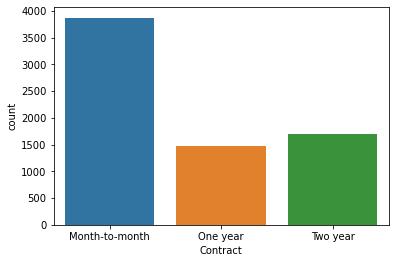

In [33]:
sns.countplot(df['Contract'])
print(df['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


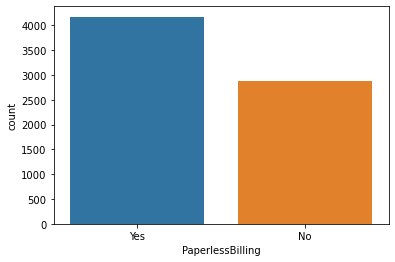

In [34]:
sns.countplot(df['PaperlessBilling'])
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


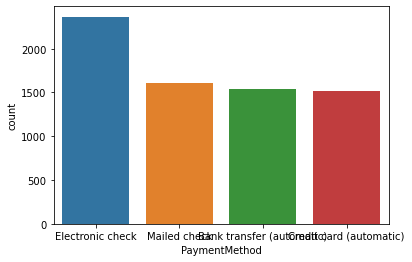

In [35]:
sns.countplot(df['PaymentMethod'])
print(df['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


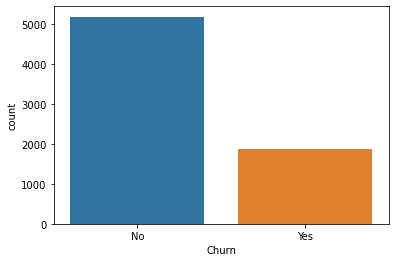

In [36]:
sns.countplot(df['Churn'])
print(df['Churn'].value_counts())

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

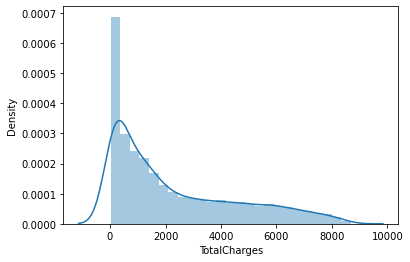

In [37]:
sns.distplot(df['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

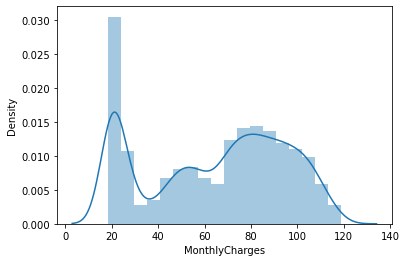

In [38]:
sns.distplot(df['MonthlyCharges'],kde=True)

In [39]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

# Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
columns=['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
         'PaymentMethod','Churn']
le=LabelEncoder()
for cols in columns:
    df[cols]=le.fit_transform(df[cols])

In [42]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


# Checking Outliers

customerID             AxesSubplot(0.125,0.536818;0.0545775x0.343182)
gender              AxesSubplot(0.190493,0.536818;0.0545775x0.343182)
SeniorCitizen       AxesSubplot(0.255986,0.536818;0.0545775x0.343182)
Partner             AxesSubplot(0.321479,0.536818;0.0545775x0.343182)
Dependents          AxesSubplot(0.386972,0.536818;0.0545775x0.343182)
tenure              AxesSubplot(0.452465,0.536818;0.0545775x0.343182)
PhoneService        AxesSubplot(0.517958,0.536818;0.0545775x0.343182)
MultipleLines       AxesSubplot(0.583451,0.536818;0.0545775x0.343182)
InternetService     AxesSubplot(0.648944,0.536818;0.0545775x0.343182)
OnlineSecurity      AxesSubplot(0.714437,0.536818;0.0545775x0.343182)
OnlineBackup         AxesSubplot(0.77993,0.536818;0.0545775x0.343182)
DeviceProtection    AxesSubplot(0.845423,0.536818;0.0545775x0.343182)
TechSupport               AxesSubplot(0.125,0.125;0.0545775x0.343182)
StreamingTV            AxesSubplot(0.190493,0.125;0.0545775x0.343182)
StreamingMovies     

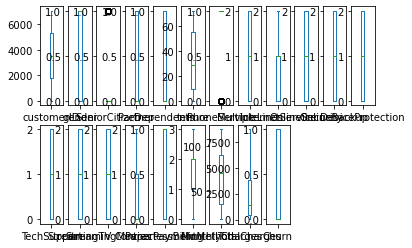

In [43]:
df.plot(kind='box',subplots=True,layout=(2,12))

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In column no.6 Outliers is present and it is a categorical column.

<AxesSubplot:>

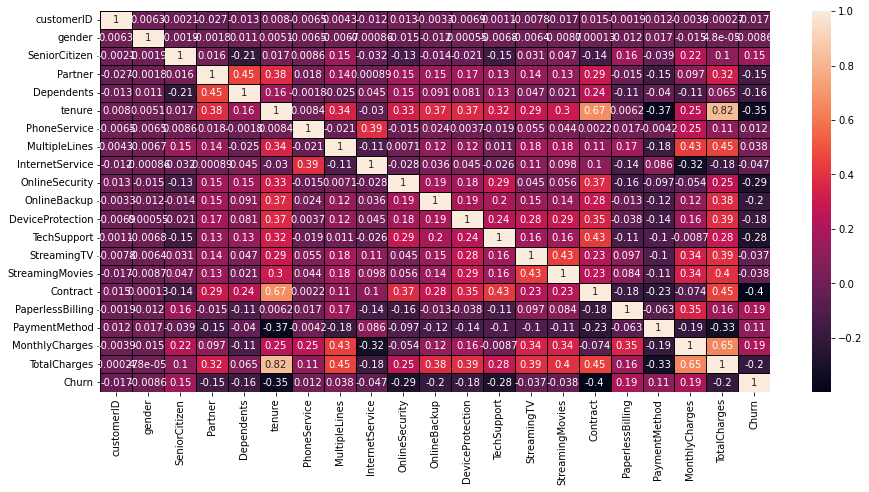

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

Checking Correlation of columns with target variable

In [50]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

In [ ]:
From here we can see which columns have how much co-relation with the Target variable 

# Training and Testing Data

In [46]:
x=df.drop(columns=['TotalCharges'],axis=1)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [47]:
y=df['TotalCharges']
y

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# Scalling the data using Min-Max Scaler

In [78]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [52]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the traning accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")
        

At random state0,the traning accuracy is:-0.9058706722803965
At random state0,the testing accuracy is:-0.8977317673785854


At random state1,the traning accuracy is:-0.9052277082152647
At random state1,the testing accuracy is:-0.9003132716690803


At random state2,the traning accuracy is:-0.9056858398935238
At random state2,the testing accuracy is:-0.8984735750686543


At random state3,the traning accuracy is:-0.9044956724241888
At random state3,the testing accuracy is:-0.9032713403489678


At random state4,the traning accuracy is:-0.9031354749784841
At random state4,the testing accuracy is:-0.9085937883962479


At random state5,the traning accuracy is:-0.9026338340566922
At random state5,the testing accuracy is:-0.9101290251842342


At random state6,the traning accuracy is:-0.9028087364691222
At random state6,the testing accuracy is:-0.9097783155230829


At random state7,the traning accuracy is:-0.9030731852162728
At random state7,the testing accuracy is:-0.9090152662295625


At rando

As we are getting maximum values of r2 score for training and testing accuracy  at random state=12 almost same.

In [66]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [67]:
 lr.fit(x_train,y_train)

LinearRegression()

In [68]:
pred_train=lr.predict(x_train)

In [76]:
lr.score(x_train,y_train)

0.904295058479142

In [70]:
print(-r2_score(y_test,pred_test))

0.9349272599005327


In [84]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.8961724158468525
-0.1490082307293248
-0.1506213190259269


In [85]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(predknr)
knr.score(x_test,y_test)

[ 561.53 2045.26 1757.67 ...  564.37 1464.5   337.91]


0.9459641450890836

# Cross validation of Model

In [74]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean}and accuracy score for training is {Train_accuracy}and accuracy for the testing is{Test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.9033382537767014and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 3 the cv score is 0.9037012261875313and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 4 the cv score is 0.9037044584134895and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 5 the cv score is 0.9036665825623267and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 6 the cv score is 0.9037349024389357and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 7 the cv score is 0.9035677539347997and accuracy score for training is 0.904295058479142and accuracy for the testing is-0.9349272599005327


At cross fold 8 the cv score is 0.9035565941557734and accuracy score f

In [ ]:
value of cv=6 is selected as it gives maximum value of score.

In [77]:
#predicting the value
pred=lr.predict(x_test)
print('Predictes result price:',pred)
print('Actual price',y_test)

Predictes result price: [ 677.27659794 3621.56109676 1912.33266733 ...  216.51676561 2519.66795467
 1194.78733979]
Actual price 6235     880.20
3980    2979.50
6548    1647.00
3954    1563.90
5328    3462.10
         ...   
1975     390.40
3164    3143.65
2600      70.10
3828    1319.95
5277     577.60
Name: TotalCharges, Length: 1409, dtype: float64


# Regularization

In [80]:
from sklearn.linear_model import Lasso,Ridge

In [81]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([-2.40632019e-03,  2.02539279e+01, -8.30213072e+00,  5.40974975e+00,
       -4.01400135e+01,  5.98766986e+01, -4.55558628e+01,  4.47276290e+01,
       -1.52518110e+01,  1.10936997e+02,  1.29299440e+02,  9.81632873e+01,
        1.04474455e+02,  4.69936179e+01,  4.97642760e+01, -8.17653175e+01,
       -1.63773353e+01,  5.11779086e+01,  3.51077780e+01, -1.91891106e+02])

In [82]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_

array([-2.40632127e-03,  2.02543188e+01, -8.30314545e+00,  5.41066604e+00,
       -4.01410597e+01,  5.98766950e+01, -4.55571300e+01,  4.47277601e+01,
       -1.52517730e+01,  1.10937102e+02,  1.29299552e+02,  9.81633625e+01,
        1.04474552e+02,  4.69937404e+01,  4.97643797e+01, -8.17658406e+01,
       -1.63778329e+01,  5.11780038e+01,  3.51077814e+01, -1.91891712e+02])

In [83]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9042950582841439


array([-2.40619124e-03,  2.02502754e+01, -8.29950358e+00,  5.40302982e+00,
       -4.01253531e+01,  5.98769770e+01, -4.55179932e+01,  4.47240861e+01,
       -1.52598444e+01,  1.10931201e+02,  1.29293019e+02,  9.81585193e+01,
        1.04469274e+02,  4.69920086e+01,  4.97625081e+01, -8.17432724e+01,
       -1.63764658e+01,  5.11752925e+01,  3.51075365e+01, -1.91826915e+02])

# Best Fit Line for the model 

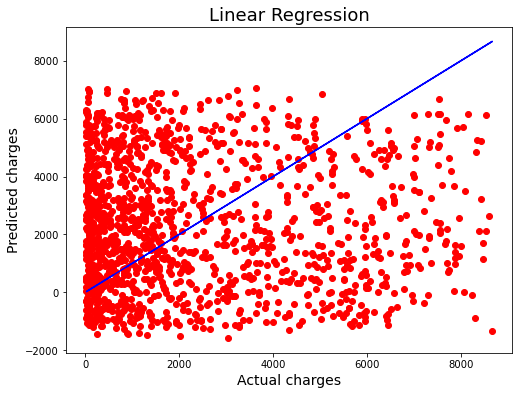

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Saving The Model

In [ ]:
import joblib
joblib.dump(enr,'enrfile.obj')
enr_from_joblib=joblib.load('enrfile.obj')
enr_from_joblib.predict(x_test)

In [ ]:
Conclusion

In [ ]:
 if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state",i,"The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),"\n\n")